ABSTRACT

En el presente trabajo se analizan un conjunto de datos de reportes donde se detallan los crímenes de Estados Unidos de América comprendidos entre los años 1980 y 2014. Todos los datos presentados son parte de una extensión del trabajo de "Murder Accountability Project. Además, se encuentra incluída una columna, en la cual, se detallan los estados en los que fueron cometidos, para lograr una fácil representación geográfica de los mismos.
El proyecto "The Murder Accountability Project" es la más completa base de datos de homicidios en Estados Unidos de América, que se encuentra disponible hasta la fecha. Este dataset incluye asesinatos de los archivos del FBI desde 1975 hasta el presente y también contiene información libre de más de 22.000 homicidios que no fueron reportados al departamento de justicia de los Estados Unidos. Este dataset incluye edad, grupo étnico, sexo de los asesinos, como también de las víctimas. También, se incluye la relación entre ellos y el arma utilizada.
El objetivo del estudio de los datos es conocer si se puede detectar el comportamiento de los asesinos y evitar que se produzcan nuevos homicidios a futuro.
Para ello podemos plantear ciertas hipótesis, con el objetivo de sacar algunas conclusiones de los datos como por ejemplo:

- Los crímenes han disminuido a lo largo de los años.
- Los crímenes son cometidos en su mayoria por hombres.
- Los crímenes son cometidos mayormente a mujeres.
- Existe una relación entre la cantidad de crimenes cometidos y el estado donde se producen.

Verificadas algunas de las hipotesis podemos plantear la posibilidad de predecir el sexo de los perpetuadores de crimenes entrenando un modelo con los datos que tenemos.


1 Librerias y carga de datos.

1.1 Cargamos las librerias utilizadas en el trabajo.

In [1]:
#Manipulacion de los datos:
import pandas as pd 
import numpy as np
from IPython.display import Markdown, display

#Librerias graficas:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import seaborn as sns

# Librerias ML:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Libraries to study
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.preprocessing import LFR, Reweighing
from aif360.algorithms.inprocessing import AdversarialDebiasing, PrejudiceRemover
from aif360.algorithms.postprocessing import CalibratedEqOddsPostprocessing, EqOddsPostprocessing, RejectOptionClassification



`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df

1.2 Leemos el archivo del dataset.

In [2]:
crimes_df = pd.read_csv('database.csv', na_values=['Unknown', ' '])

2 EDA y preparacion de los datos.

2.1 Preparación de los datos.

In [3]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Record ID              638454 non-null  int64  
 1   Agency Code            638454 non-null  object 
 2   Agency Name            638407 non-null  object 
 3   Agency Type            638454 non-null  object 
 4   City                   638454 non-null  object 
 5   State                  638454 non-null  object 
 6   Year                   638454 non-null  int64  
 7   Month                  638454 non-null  object 
 8   Incident               638454 non-null  int64  
 9   Crime Type             638454 non-null  object 
 10  Crime Solved           638454 non-null  object 
 11  Victim Sex             637470 non-null  object 
 12  Victim Age             638454 non-null  int64  
 13  Victim Race            631778 non-null  object 
 14  Victim Ethnicity       270151 non-nu

In [ ]:
crimes_df.head(5).T

,0,1,2,3,4
Record ID,1,2,3,4,5
Agency Code,AK00101,AK00101,AK00101,AK00101,AK00101
Agency Name,Anchorage,Anchorage,Anchorage,Anchorage,Anchorage
Agency Type,Municipal Police,Municipal Police,Municipal Police,Municipal Police,Municipal Police
City,Anchorage,Anchorage,Anchorage,Anchorage,Anchorage
State,Alaska,Alaska,Alaska,Alaska,Alaska
Year,1980,1980,1980,1980,1980
Month,January,March,March,April,April
Incident,1,1,2,1,2
Crime Type,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter


In [ ]:
crimes_df.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

Las variables citadas anteriormente nos permitiran conocer la naturaleza de los crimenes cometidos en EE UU durante los años analizados.

In [ ]:
crimes_df.shape

(638454, 24)

In [ ]:
crimes_df.describe()

,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638453.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,20.322697,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,17.886842,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,21.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,31.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,99.000000,10.000000,10.000000


Haciendo un análisis rápido de los datos que poseemos podemos prescindir de algunas columnas, que no nos serviran para los análisis ni para el modelado como ser:
- Record ID. Es un valor único para cada crimen por lo que no haría falta.
- Agency Code. Sería lo mismo que usar el nombre de la agencia.
- Perpetrator Ethnicity: corresponde a la variable objetivo

In [ ]:
cols_to_drop = ['Record ID', 'Agency Code', 'Perpetrator Ethnicity']
data_original = crimes_df.copy()
crimes_df.drop(columns=cols_to_drop, inplace=True)
cols_to_drop = []

Generamos una nueva columna donde nos agrupe la edad del perpetuador en una variable cualitativa.

In [ ]:
crimes_df['Perpetrator Age category'] = np.where(crimes_df['Perpetrator Age'] > 64, 'Elder', np.where(crimes_df['Perpetrator Age'] < 25, 'Young', 'Adult'))

2.2 Generacion de algunas gráficas.

Crímenes distribuidos por años.

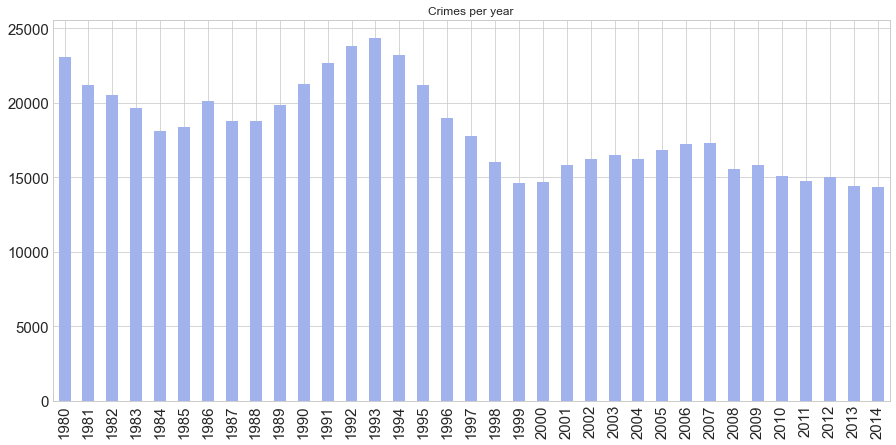

In [ ]:
years = crimes_df['Year']
count_years = years.value_counts()
hom = count_years.sort_index(axis=0, ascending=True)
graphic = hom.plot(kind='bar', figsize=(15, 7), color='#A1B2EC', title='Crimes per year', fontsize=15)

Se puede apreciar la cantidad de crimenes por año. Como estos a lo largo del paso del tiempo fueron disminuyendo.

Comparamos ahora los crimenes por sexo:

<function matplotlib.pyplot.show(close=None, block=None)>

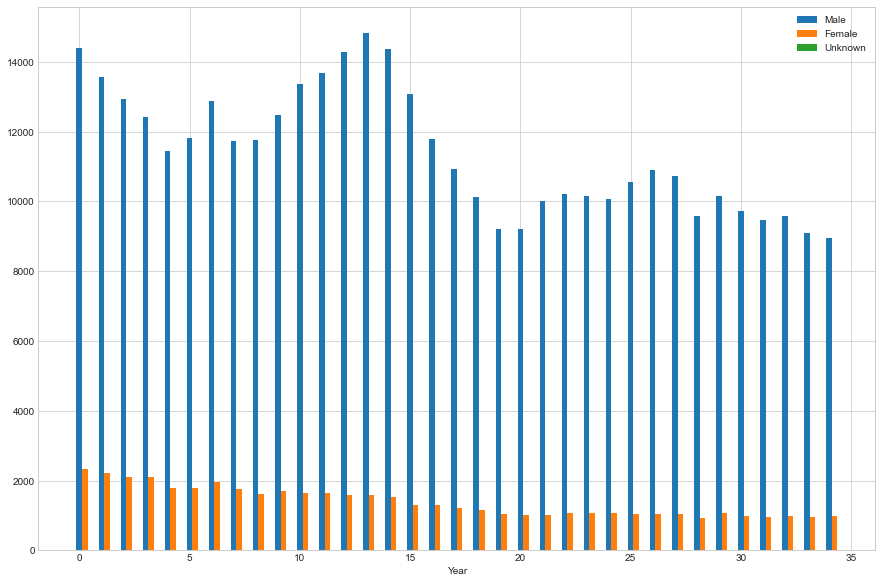

In [ ]:
male = crimes_df['Perpetrator Sex'] == 'Male'
male_perp = pd.DataFrame(crimes_df.loc[male], columns = ['Year'])
male_perp2 = male_perp.stack().value_counts()
male_perp3 = male_perp2.sort_index(axis=0, ascending=False)

fem = crimes_df['Perpetrator Sex'] == 'Female'
fem_perp = pd.DataFrame(crimes_df.loc[fem], columns = ['Year'])
fem_perp2 = fem_perp.stack().value_counts()
fem_perp3 = fem_perp2.sort_index(axis=0, ascending=False)

ukn = crimes_df['Perpetrator Sex'] == 'Unknown'
ukn_perp = pd.DataFrame(crimes_df.loc[ukn], columns = ['Year'])
ukn_perp2 = ukn_perp.stack().value_counts()
ukn_perp3 = ukn_perp2.sort_index(axis=0, ascending=False)

hom2 = pd.DataFrame({'Male': male_perp3, 'Female': fem_perp3, 'Unknown': ukn_perp3})
hom2.sort_index(inplace=True)
pos = list(range(len(hom2['Male'])))

width = 0.25

hom2
plt.rcParams["figure.figsize"] = (15,10)
plt.bar(pos,hom2['Male'],width)
plt.bar([p + width for p in pos], hom2['Female'], width)
plt.bar([p+2*width for p in pos], hom2['Unknown'],width)

plt.xlabel('Year')
plt.legend(['Male','Female','Unknown'])
plt.grid
plt.show

En este caso se puede apreciar como fueron fluctuando los crimenes a lo largo de los años segun el sexo.

También analizamos como son los porcentajes de crimenes segun el sexo del perpretrador.

Text(0, 0.5, '')

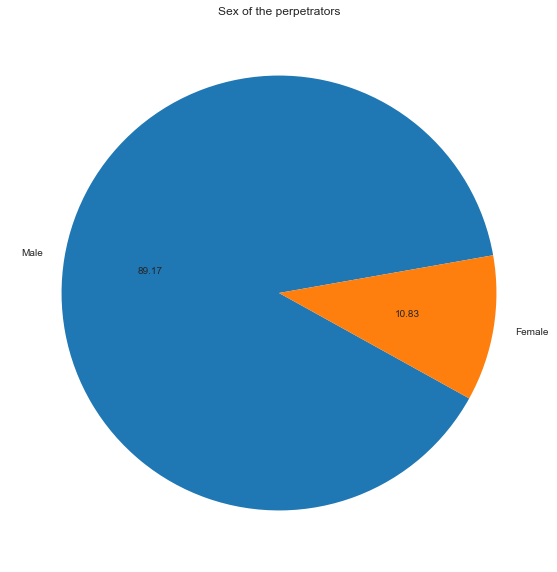

In [ ]:
perpetrator_sex = pd.DataFrame(crimes_df, columns = ['Perpetrator Sex']) 
count_perpetrator_sex = perpetrator_sex.stack().value_counts()
ax = count_perpetrator_sex.plot(kind = 'pie',
                              title = 'Sex of the perpetrators',
                              startangle = 10,
                              autopct='%.2f')

ax.set_ylabel('')

In [ ]:
crimes_df['Frequency'] = 1
freq_target = crimes_df[['Perpetrator Sex', 'Perpetrator Race', 'Perpetrator Age category', 'Frequency']]
del crimes_df['Frequency']
freq_target = freq_target.groupby(by=['Perpetrator Sex', 'Perpetrator Race', 'Perpetrator Age category']).count() / len(crimes_df)
print(freq_target.sort_values(by='Frequency', ascending=False))

                                                                        Frequency
Perpetrator Sex Perpetrator Race              Perpetrator Age category           
Male            White                         Adult                      0.185523
                Black                         Young                      0.154738
                                              Adult                      0.138589
                White                         Young                      0.111779
Female          Black                         Adult                      0.025162
                White                         Adult                      0.024389
                Black                         Young                      0.012928
                White                         Young                      0.009666
Male            White                         Elder                      0.009434
                Asian/Pacific Islander        Adult                      0.004951
                

Graficos en Seaborn

Crimenes segun el año otra vez, esta vez en Seaborn, con mucho menos código.

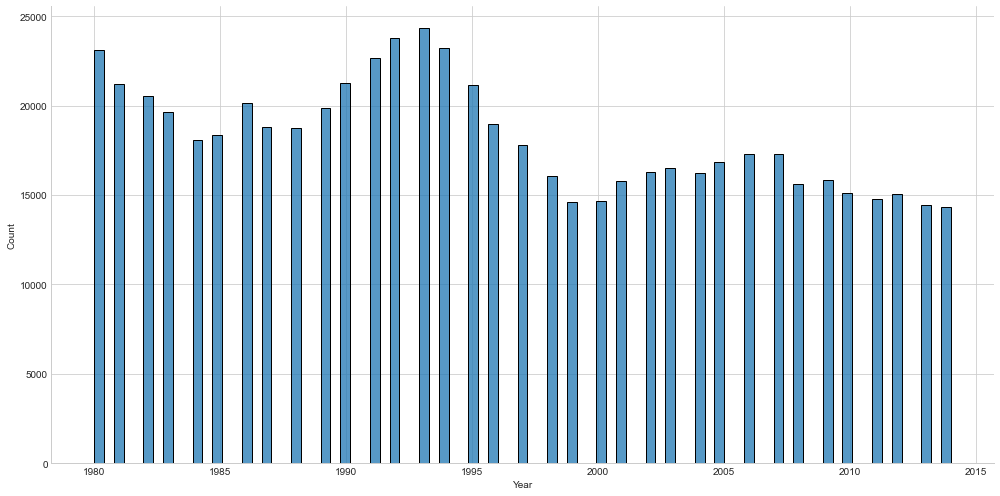

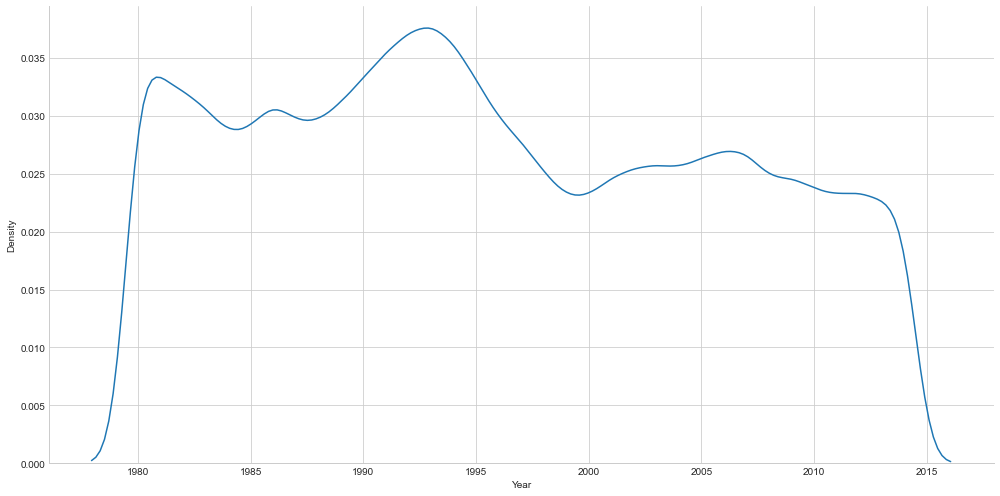

In [ ]:
sns.displot(crimes_df['Year'], kind='hist', height=7, aspect=2)
sns.displot(crimes_df['Year'], kind='kde', height=7, aspect=2)

Tambien podemos hacer un grafico de barras en seaborn segun el lugar donde se cometio el crimen.

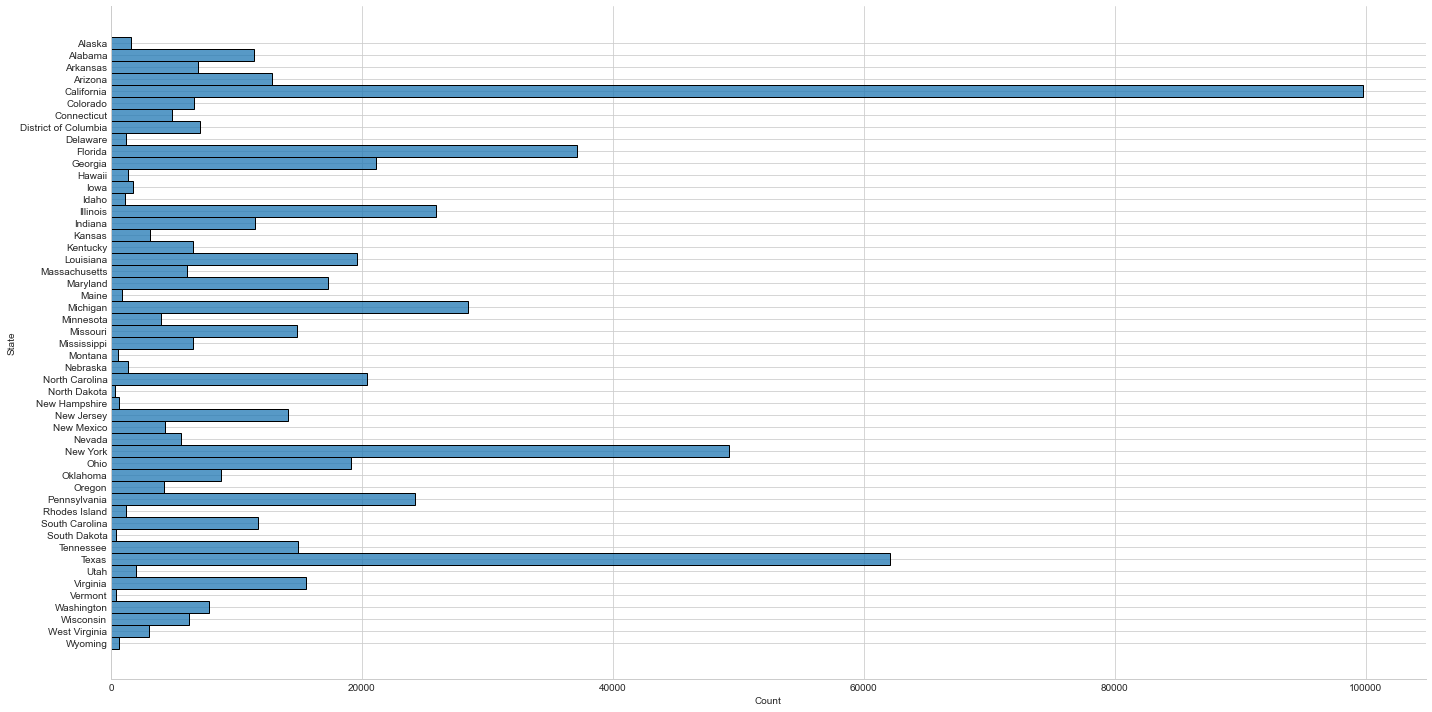

In [ ]:
sns.displot(data=crimes_df, y='State', height=10, aspect=2)

Por ultimo se realizó un grafico que distingue segun el sexo los crimenes ordenados por año en un grafico de barras.

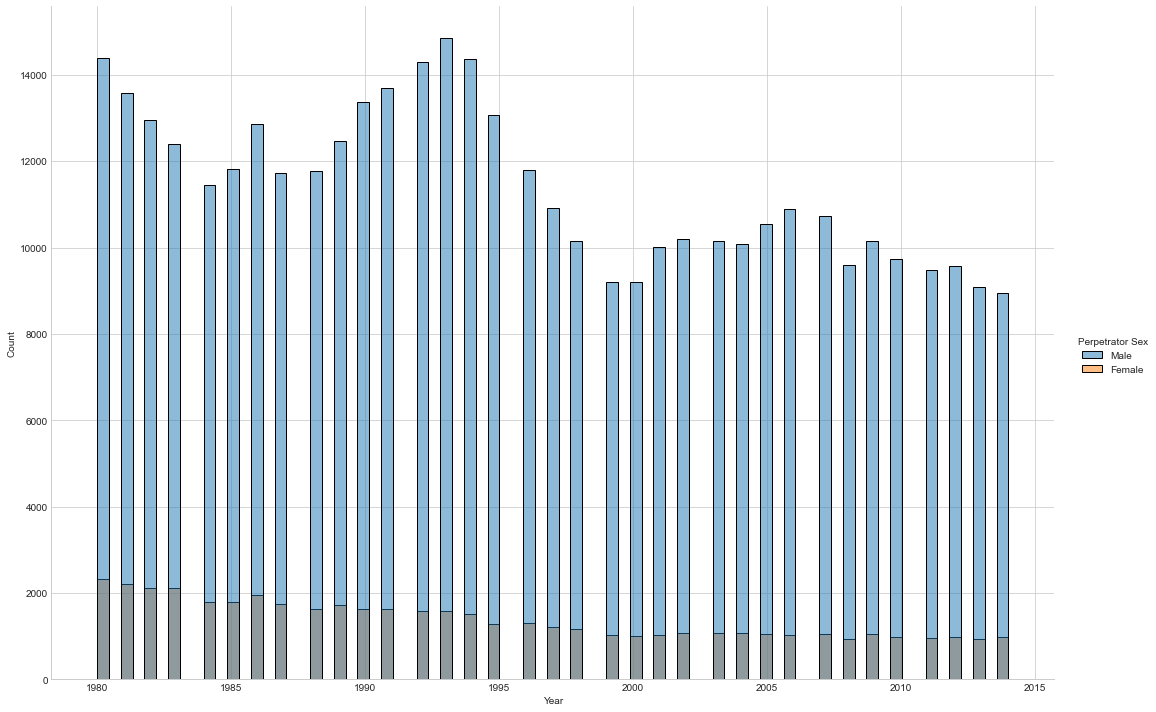

In [ ]:
sns.displot(crimes_df,x='Year',hue='Perpetrator Sex', height=10, aspect=1.5)

In [ ]:
#Definimos una funcion que nos grafique en un histograma y un diagrama de torta la variable de interes.

def var_distribution(y_var, data):
    val = crimes_df[y_var]
    
    plt.rcParams.update({'font.size': 13})
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    cnt = val.value_counts().sort_values(ascending=True)
    labels = cnt.index.values

    sizes = cnt.values
    colors = sns.color_palette("PuBu", len(labels))

    #------------COUNT-----------------------
    ax1.barh(cnt.index.values, cnt.values, color=colors)
    ax1.set_title('Count plot of '+y_var)

    #------------PERCENTAGE-------------------
    ax2.pie(sizes, labels=labels, colors=colors,autopct='%1.0f%%', shadow=True, startangle=130)
    ax2.axis('equal')
    ax2.set_title('Distribution of '+y_var)
    plt.show()

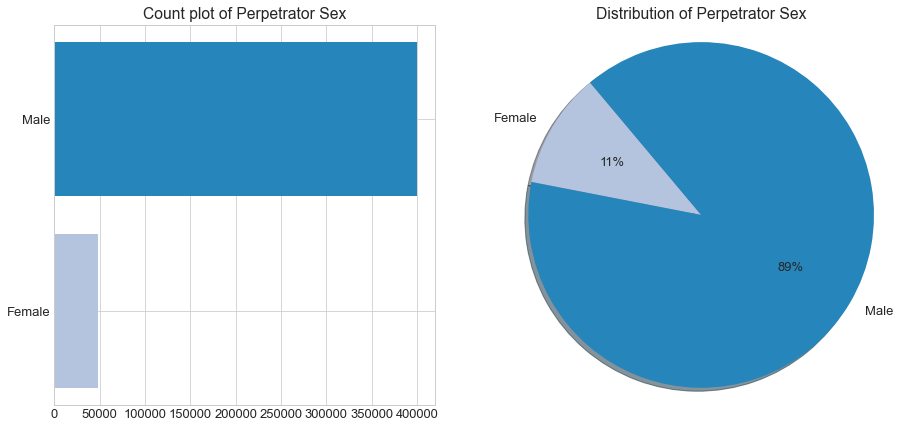

In [ ]:
var= 'Perpetrator Sex'
var_distribution(var,crimes_df)

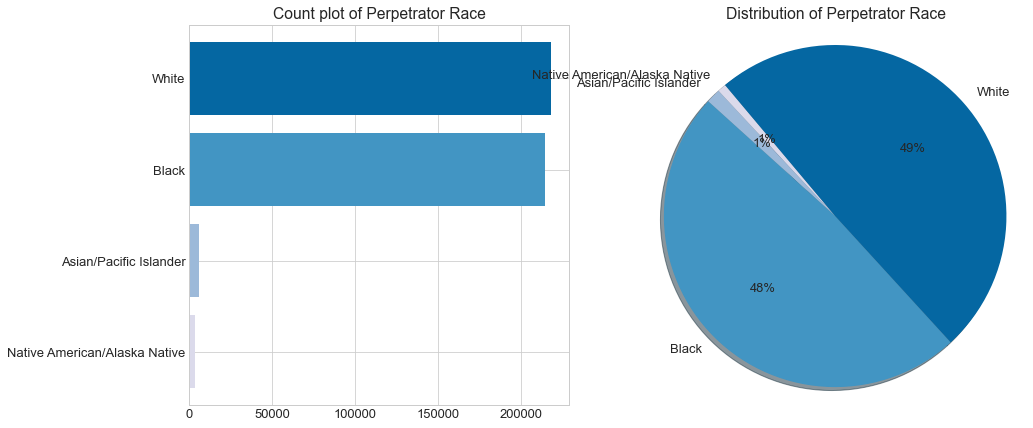

In [ ]:
var= 'Perpetrator Race'
var_distribution(var,crimes_df)

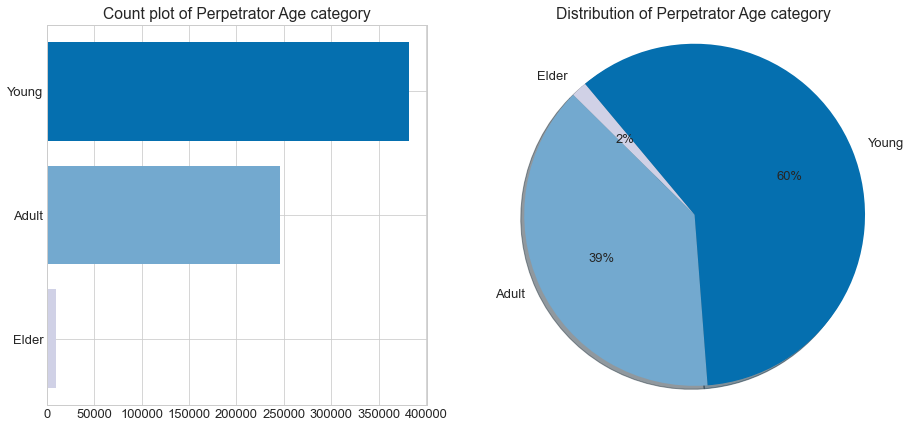

In [ ]:
var = 'Perpetrator Age category'
var_distribution(var, crimes_df)

2.3 Tratamiento de missing values.

In [ ]:
def print_missing_values(data):
    data_null = pd.DataFrame(len(data) - data.notnull().sum(), columns = ['Count'])
    data_null = data_null[data_null['Count'] > 0].sort_values(by='Count', ascending=False)
    data_null = data_null/len(data)*100
    print(data_null)
    print(data_null.plot(kind='bar', figsize=(15, 7), color='#A1B2EC', title='Missing values per category', fontsize=15))

    

                      Count
Victim Ethnicity  57.686693
Relationship      42.761577
Perpetrator Race  30.706519
Perpetrator Sex   29.816557
Weapon             5.198808
Victim Race        1.045651
Victim Sex         0.154122
Agency Name        0.007362
Perpetrator Age    0.000157
AxesSubplot(0.125,0.125;0.775x0.755)


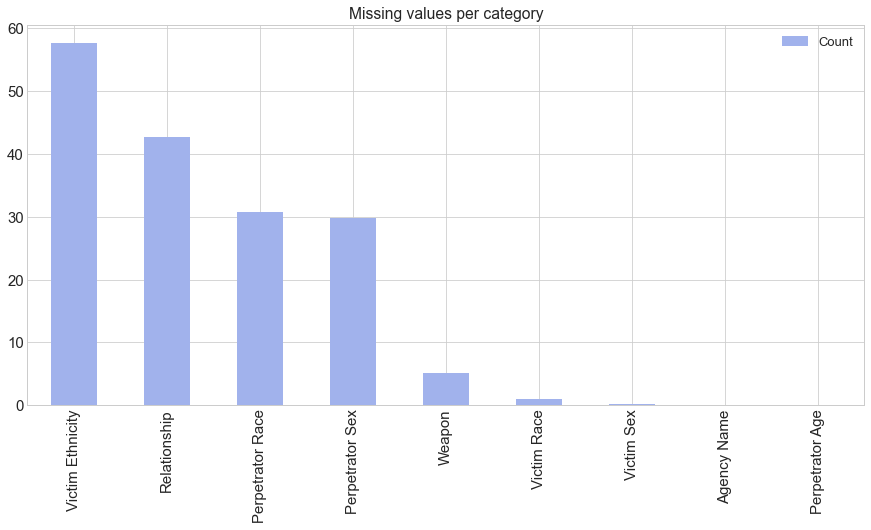

In [ ]:
print_missing_values(crimes_df)


In [ ]:
crimes_df["Perpetrator Age"] =  crimes_df["Perpetrator Age"].fillna(crimes_df["Perpetrator Age"].median())

In [ ]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Agency Name               638407 non-null  object 
 1   Agency Type               638454 non-null  object 
 2   City                      638454 non-null  object 
 3   State                     638454 non-null  object 
 4   Year                      638454 non-null  int64  
 5   Month                     638454 non-null  object 
 6   Incident                  638454 non-null  int64  
 7   Crime Type                638454 non-null  object 
 8   Crime Solved              638454 non-null  object 
 9   Victim Sex                637470 non-null  object 
 10  Victim Age                638454 non-null  int64  
 11  Victim Race               631778 non-null  object 
 12  Victim Ethnicity          270151 non-null  object 
 13  Perpetrator Sex           448089 non-null  o

In [ ]:
crimes_df["Perpetrator Age"] = crimes_df["Perpetrator Age"].astype('int64')

In [ ]:
crimes_df['Crime Solved'].value_counts()

Yes    448172
No     190282
Name: Crime Solved, dtype: int64

In [ ]:
solved_crimes = pd.DataFrame(crimes_df[crimes_df['Crime Solved'] == 'Yes'])
cols_to_drop = []

In [ ]:
Y_columns = ['Perpetrator Sex', 'Perpetrator Race', 'Perpetrator Age category']
ignore_columns = ['Crime Solved']
cat_columns = []
num_columns = []

for col in crimes_df.columns.values:
    if col in Y_columns+ignore_columns:
        continue
    elif crimes_df[col].dtypes == 'int64':
        num_columns += [col]
    else:
        cat_columns += [col]

In [ ]:
median_val = pd.Series(dtype='int64')
median_val
for col in num_columns:
    median_val[col] = crimes_df[col].median()

In [ ]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Agency Name               638407 non-null  object
 1   Agency Type               638454 non-null  object
 2   City                      638454 non-null  object
 3   State                     638454 non-null  object
 4   Year                      638454 non-null  int64 
 5   Month                     638454 non-null  object
 6   Incident                  638454 non-null  int64 
 7   Crime Type                638454 non-null  object
 8   Crime Solved              638454 non-null  object
 9   Victim Sex                637470 non-null  object
 10  Victim Age                638454 non-null  int64 
 11  Victim Race               631778 non-null  object
 12  Victim Ethnicity          270151 non-null  object
 13  Perpetrator Sex           448089 non-null  object
 14  Perp

In [ ]:
def handle_missing_values(data, median_val):
    df = data.copy()
    for col in df:
        if col in median_val.index.values:
            df[col] = df[col].fillna(median_val[col])
        else:
            df[col] = df[col].fillna("Missing value")
    
    return df

In [ ]:
crimes_df = handle_missing_values(crimes_df,median_val)

In [ ]:
crimes_df['Frequency'] = 1
freq_target = crimes_df[['Perpetrator Sex', 'Perpetrator Race', 'Perpetrator Age category', 'Frequency']]
del crimes_df['Frequency']
freq_target = freq_target.groupby(by=['Perpetrator Sex', 'Perpetrator Race', 'Perpetrator Age category']).count() / len(crimes_df)
print(freq_target.sort_values(by='Frequency', ascending=False))

                                                                        Frequency
Perpetrator Sex Perpetrator Race              Perpetrator Age category           
Missing value   Missing value                 Young                      0.297196
Male            White                         Adult                      0.185523
                Black                         Young                      0.154738
                                              Adult                      0.138589
                White                         Young                      0.111779
Female          Black                         Adult                      0.025162
                White                         Adult                      0.024389
                Black                         Young                      0.012928
                White                         Young                      0.009666
Male            White                         Elder                      0.009434
                

In [ ]:
crimes_df.head().T

,0,1,2,3,4
Agency Name,Anchorage,Anchorage,Anchorage,Anchorage,Anchorage
Agency Type,Municipal Police,Municipal Police,Municipal Police,Municipal Police,Municipal Police
City,Anchorage,Anchorage,Anchorage,Anchorage,Anchorage
State,Alaska,Alaska,Alaska,Alaska,Alaska
Year,1980,1980,1980,1980,1980
Month,January,March,March,April,April
Incident,1,1,2,1,2
Crime Type,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter
Crime Solved,Yes,Yes,No,Yes,No
Victim Sex,Male,Male,Female,Male,Female


In [ ]:
def plot_histo(data, col, Y_columns):
    df = data.copy()
    fig, axs = plt.subplots(1,2,figsize=(20,6))
    
    for i in range(0,2):
        cnt = []; y_col = Y_columns[i]
        Y_values = df[y_col].dropna().drop_duplicates().values
        for val in Y_values:
            cnt += [df[df[y_col] == val][col].values]
        bins = df[col].nunique()

        axs[i].hist(cnt, bins=bins, stacked=True)
        axs[i].legend(Y_values,loc='upper right')
        axs[i].set_title("Histogram of the "+col+" column by "+y_col)

    plt.show()

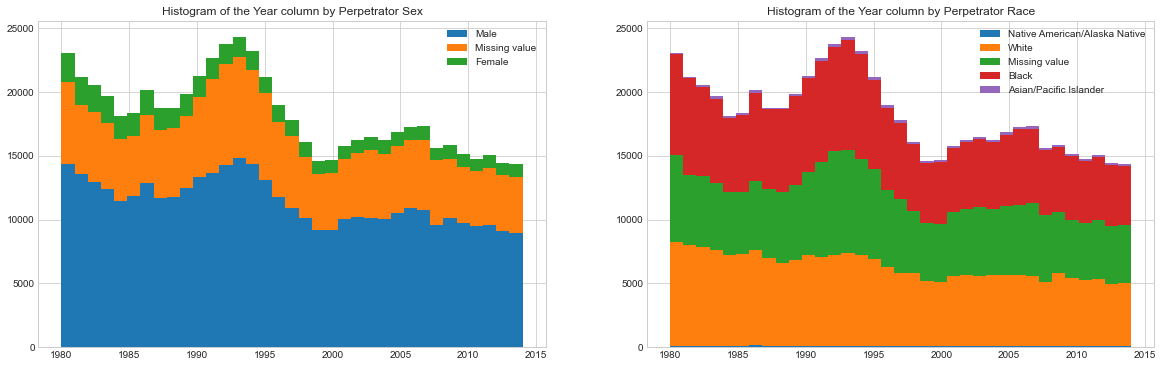

In [ ]:
plot_histo(crimes_df,col='Year' ,Y_columns=Y_columns)

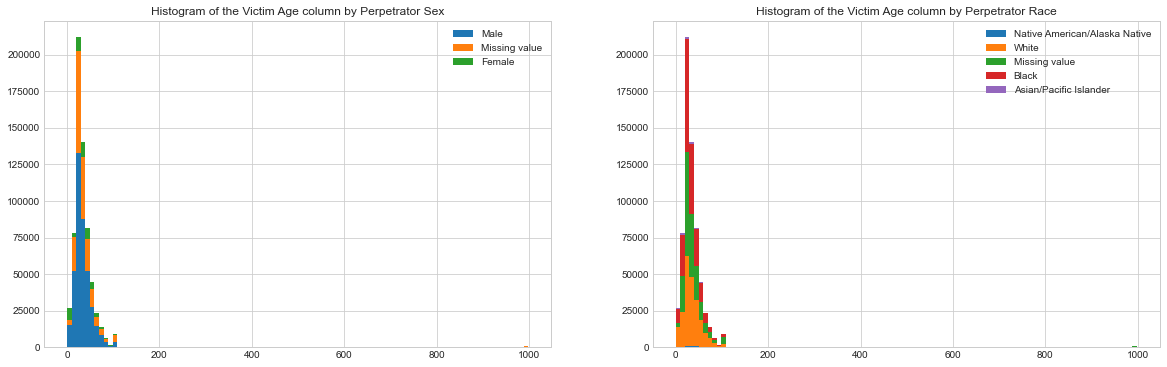

In [ ]:
plot_histo(crimes_df,col='Victim Age' ,Y_columns=Y_columns)

In [ ]:
crimes_df['Victim Age'].describe()

count    638454.000000
mean         35.033512
std          41.628306
min           0.000000
25%          22.000000
50%          30.000000
75%          42.000000
max         998.000000
Name: Victim Age, dtype: float64

Aca podemos ver que la edad maxima es 998 por lo que debe haber habido un error de tipeo. Por lo que procedemos a eliminarla.

In [ ]:
crimes_df['Victim Age'] = np.where(crimes_df['Victim Age'] == 998, np.median(crimes_df[crimes_df['Victim Age'] <= 100]['Victim Age']), crimes_df['Victim Age'])

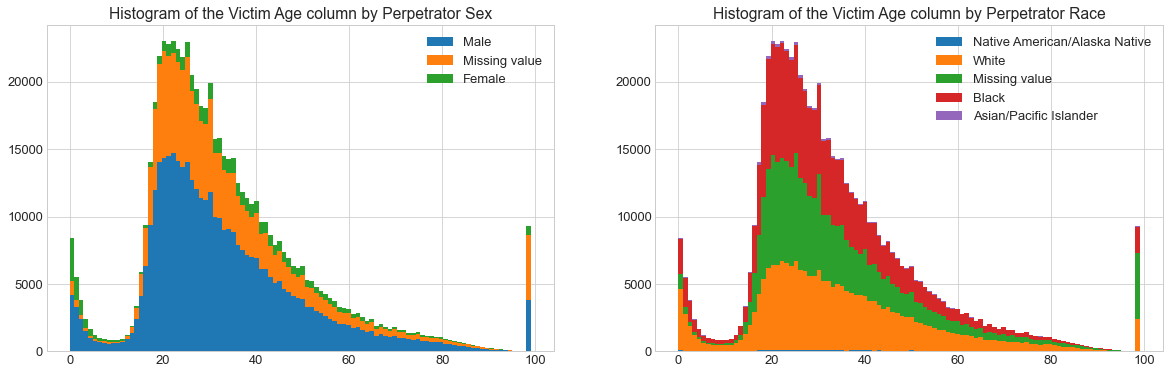

In [ ]:
plot_histo(crimes_df,col='Victim Age' ,Y_columns=Y_columns)

También podemos concluir que la columna Incident no nos servirá.

In [ ]:
cols_to_drop += ['Incident']
crimes_df.drop(columns = cols_to_drop, inplace=True)

3 Trabajando con las caracteristicas.

In [ ]:
# cat_columns.remove('Perpetrator Age')
cat_columns
categorical_features = cat_columns + ['Perpetrator Sex', 'Perpetrator Race', 'Perpetrator Age category', 'Crime Solved']


categorical_features = categorical_features 
ategorical_features_idx = [np.where(crimes_df.columns.values == col)[0][0] for col in categorical_features]

# # del cat_columns

# print(categorical_features_idx)


Encode valores categóricos.

In [ ]:
data_encoded = crimes_df.copy()

categorical_names = {}
encoders = {}

# Use Label Encoder for categorical columns (including target column)
for feature in categorical_features:
    le = LabelEncoder()
    le.fit(data_encoded[feature])
    
    data_encoded[feature] = le.transform(data_encoded[feature])
    
    categorical_names[feature] = le.classes_
    encoders[feature] = le

In [ ]:
data_encoded #Solo codificadas las características cualitativas.

,Agency Name,Agency Type,City,State,Year,Month,Crime Type,Crime Solved,Victim Sex,Victim Age,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,Perpetrator Age category
0,149,1,35,1,1980,4,1,1,1,14.0,...,1,1,15,3,0,0,0,0,0,2
1,149,1,35,1,1980,7,1,1,1,43.0,...,1,1,42,4,0,14,0,0,0,0
2,149,1,35,1,1980,7,1,0,0,30.0,...,1,2,0,2,17,10,0,0,0,2
3,149,1,35,1,1980,0,1,1,1,43.0,...,1,1,42,4,0,14,0,0,0,0
4,149,1,35,1,1980,0,1,0,0,30.0,...,1,2,0,2,17,10,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,5754,3,1211,50,2014,4,1,0,1,30.0,...,0,2,0,2,17,8,0,0,0,2
638450,6899,3,1459,50,2014,6,1,1,1,62.0,...,1,1,57,4,0,8,0,0,0,0
638451,6898,1,1459,50,2014,11,1,1,0,0.0,...,1,0,22,0,6,15,0,0,0,2
638452,7940,3,1534,50,2014,2,1,1,1,55.0,...,2,1,31,4,26,9,0,1,0,0


Encode de valores numéricos.

In [ ]:
numerical_features = [c for c in crimes_df.columns.values if c not in categorical_features]
numerical_features.remove('Perpetrator Age')
# crimes_df[numerical_features].info()
numerical_features

for feature in numerical_features:
    val = data_encoded[feature].values[:, np.newaxis]
    mms = MinMaxScaler().fit(val)
    data_encoded[feature] = mms.transform(val)
    encoders[feature] = mms
    
data_encoded = data_encoded.astype(float)



In [ ]:
data_encoded.head()

,Agency Name,Agency Type,City,State,Year,Month,Crime Type,Crime Solved,Victim Sex,Victim Age,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,Perpetrator Age category
0,149.0,1.0,35.0,1.0,0.0,4.0,1.0,1.0,1.0,0.141414,...,1.0,1.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0
1,149.0,1.0,35.0,1.0,0.0,7.0,1.0,1.0,1.0,0.434343,...,1.0,1.0,42.0,4.0,0.0,14.0,0.0,0.0,0.0,0.0
2,149.0,1.0,35.0,1.0,0.0,7.0,1.0,0.0,0.0,0.303030,...,1.0,2.0,0.0,2.0,17.0,10.0,0.0,0.0,0.0,2.0
3,149.0,1.0,35.0,1.0,0.0,0.0,1.0,1.0,1.0,0.434343,...,1.0,1.0,42.0,4.0,0.0,14.0,0.0,0.0,0.0,0.0
4,149.0,1.0,35.0,1.0,0.0,0.0,1.0,0.0,0.0,0.303030,...,1.0,2.0,0.0,2.0,17.0,10.0,0.0,0.1,0.0,2.0


También podemos crear una función para decodificar las variables.

In [ ]:
def decode_dataset(data, encoders, numerical_features, categorical_features):
    df = data.copy()
    for feat in df.columns.values:
        if feat in numerical_features:
            df[feat] = encoders[feat].inverse_transform(np.array(df[feat]).reshape(-1, 1))
    for feat in categorical_features:
        df[feat] = encoders[feat].inverse_transform(df[feat].astype(int))
    return df

In [ ]:
decode_dataset(data_encoded, encoders=encoders, numerical_features=numerical_features, categorical_features=categorical_features).head()

,Agency Name,Agency Type,City,State,Year,Month,Crime Type,Crime Solved,Victim Sex,Victim Age,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,Perpetrator Age category
0,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,January,Murder or Manslaughter,Yes,Male,14.0,...,Missing value,Male,15.0,Native American/Alaska Native,Acquaintance,Blunt Object,0.0,0.0,FBI,Young
1,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,March,Murder or Manslaughter,Yes,Male,43.0,...,Missing value,Male,42.0,White,Acquaintance,Strangulation,0.0,0.0,FBI,Adult
2,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,March,Murder or Manslaughter,No,Female,30.0,...,Missing value,Missing value,0.0,Missing value,Missing value,Missing value,0.0,0.0,FBI,Young
3,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,April,Murder or Manslaughter,Yes,Male,43.0,...,Missing value,Male,42.0,White,Acquaintance,Strangulation,0.0,0.0,FBI,Adult
4,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,April,Murder or Manslaughter,No,Female,30.0,...,Missing value,Missing value,0.0,Missing value,Missing value,Missing value,0.0,1.0,FBI,Young


El modelo elegido para el aprendizaje automático, es el de RandomForest. Como en nuestro modelo vamos a intentar predecir la etnia del que comete el crimen, vamos a eliminar de los datos lo relativo al criminal.

In [ ]:
data_perp_sex = data_encoded.drop(['Perpetrator Race','Perpetrator Age category','Perpetrator Age'], axis=1)

In [ ]:
privileged_sex = np.where(categorical_names['Victim Sex'] == 'Male')[0]
privileged_race = np.where(categorical_names['Victim Race'] == 'White')[0]

In [ ]:
data_orig_sex = StandardDataset(data_perp_sex, 
                               label_name='Perpetrator Sex', 
                               favorable_classes=[1], 
                               protected_attribute_names=['Victim Sex', 'Victim Race'], 
                               privileged_classes=[privileged_sex, privileged_race])

In [ ]:
def meta_data(dataset):
    # print out some labels, names, etc.
    display(Markdown("#### Dataset shape"))
    print(dataset.features.shape)
    display(Markdown("#### Dataset feature names"))
    print(dataset.feature_names)

In [ ]:
meta_data(data_orig_sex)

#### Dataset shape

(638454, 17)


#### Dataset feature names

['Agency Name', 'Agency Type', 'City', 'State', 'Year', 'Month', 'Crime Type', 'Crime Solved', 'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity', 'Relationship', 'Weapon', 'Victim Count', 'Perpetrator Count', 'Record Source']


Entrenamos el modelo

Partimos nuestro dataset con un factor de 0.75, para la parte de entrenamiento y la de prueba.

In [ ]:
np.random.seed(42)

data_orig_sex_train, data_orig_sex_test = data_orig_sex.split([0.75], shuffle=True)

display(Markdown("#### Train Dataset shape"))
print("Perpetrator Sex :",data_orig_sex_train.features.shape)
display(Markdown("#### Test Dataset shape"))
print("Perpetrator Sex :",data_orig_sex_test.features.shape)

#### Train Dataset shape

Perpetrator Sex : (446917, 17)


#### Test Dataset shape

Perpetrator Sex : (191537, 17)


In [ ]:
# Entrenamos el modelo
rf_orig_sex = RandomForestClassifier().fit(data_orig_sex_train.features, 
                     data_orig_sex_train.labels.ravel(), 
                     sample_weight=data_orig_sex_train.instance_weights)

In [ ]:
# Data para el test.
X_test_sex = data_orig_sex_test.features
y_test_sex = data_orig_sex_test.labels.ravel()

In [ ]:
def get_model_performance(X_test, y_true, y_pred, probs):
    accuracy = accuracy_score(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)

    return accuracy, matrix, f1, fpr, tpr, roc_auc

def plot_model_performance(model, X_test, y_true):
    y_pred = model.predict(X_test)
    probs = model.predict_proba(X_test)
    accuracy, matrix, f1, fpr, tpr, roc_auc = get_model_performance(X_test, y_true, y_pred, probs)

    display(Markdown('#### Accuracy of the model :'))
    print(accuracy)
    display(Markdown('#### F1 score of the model :'))
    print(f1)

    fig = plt.figure(figsize=(15, 6))
    ax = fig.add_subplot(1, 2, 1)
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')



#### Accuracy of the model :

0.9538209327701698


#### F1 score of the model :

0.9640656041406824


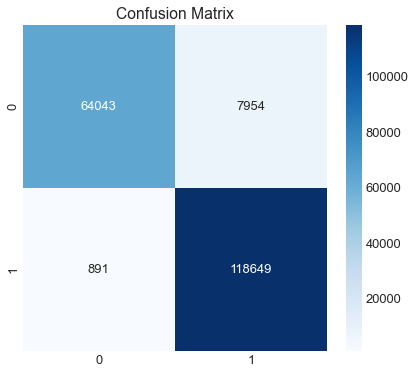

In [ ]:
plot_model_performance(rf_orig_sex, data_orig_sex_test.features, y_test_sex)

Para la evaluacion del modelo se obtuvo la "Accuracy" donde la función compara los valores predichos por el modelo, a partir de la muestra que le proporcionamos, con los valores de la muestra originales.
Tambien construimos una matriz de confusión, donde podemos apreciar que la mayoría de los eventos de la muestra se ubican en la diagonal correcta (de verdaderos positivos y verdaderos negativos).
El Valor-F (denominada también F-score o medida-F) en estadística es la medida de precisión que tiene un test. Se emplea en la determinación de un valor único ponderado de la precisión y la exhaustividad.

Los valores obtenidos para la evaluación del modelo son buenos.
